In [31]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from stats import get_stats
from pathlib import Path
interval_dir = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/interval')
ncs_dir = Path('/bsuscratch/zacharykeskinen/data/uavsar/ncs/')

from stats import get_stats

In [82]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
from stats import get_stats
from pathlib import Path
from tqdm import tqdm 

interval_dir = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/interval')
ncs_dir = Path('/bsuscratch/zacharykeskinen/data/uavsar/ncs/')

class uavsar_fp:

    def __init__(self, fp, f1, f2):
        self.fp = fp
        self.f1 = f1
        self.f2 = f2

    def check_dates(self, t1, t2):
        if (self.f1 < t1 + pd.Timedelta('2 days')) & (self.f1 > t1 - pd.Timedelta('2 days')):
            if (self.f2 < t2 + pd.Timedelta('2 days')) & (self.f2 > t2 - pd.Timedelta('2 days')):
                return self

sd_fps = list(ncs_dir.glob('232*.sd.nc'))
sd_fps = [uavsar_fp(fp, pd.to_datetime(fp.name.split('_')[1]), pd.to_datetime(fp.stem.split('_')[2].strip('.sd'))) for fp in sd_fps]

In [83]:
ds = xr.load_dataset(sd_fps[0].fp)

In [90]:
sub = ds.isel(x = slice(12000, 13000), y = slice(8000,9000), band = 0)

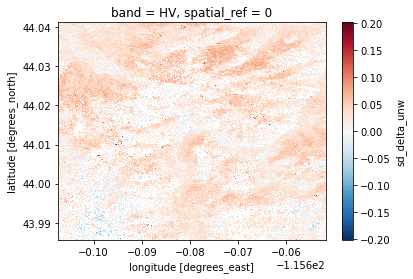

In [95]:
sub['sd_delta_unw'].where(sub['cor'] > 0.5).plot()
# sub['cor'].plot()

In [79]:
df = pd.read_csv('/bsuhome/zacharykeskinen/uavsar-validation/data/interval/interval_sd_v2.csv')

df.loc[:, 'hn'] = (df['avg HN (cm)'].combine_first(df['AVG HN (cm)']))
df = df.loc[df.hn != ' ']
df = df.dropna(subset = ['int_sd_delta', 'hn']).copy()
df.loc[:, 'hn'] = df.hn.astype(float) / 100
df.loc[:, 'int_sd_delta'] = df.int_sd_delta.astype(float)
df = df.loc[df.hn != ' ']

df['swe'] = df['SWE (mm) A'].combine_first(df['SWE (mm) B'])
df = df.loc[df['swe'] != ' ']
df.loc[:, 'swe'] = df.loc[:, 'swe'].astype(float) / 100
df = df.loc[df.swe > 0]

/tmp/ipykernel_2920/1593944956.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'hn'] = df.hn.astype(float) / 100
/tmp/ipykernel_2920/1593944956.py:12: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'swe'] = df.loc[:, 'swe'].astype(float) / 100


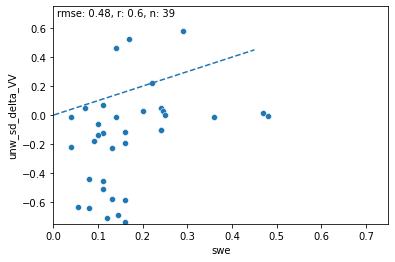

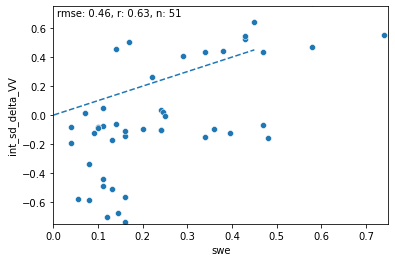

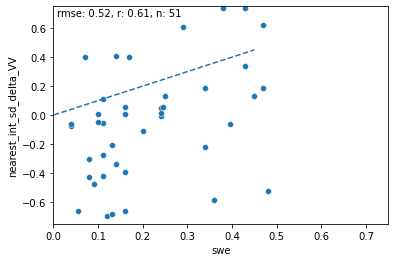

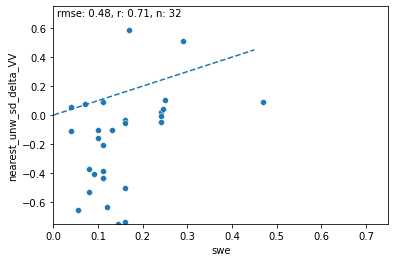

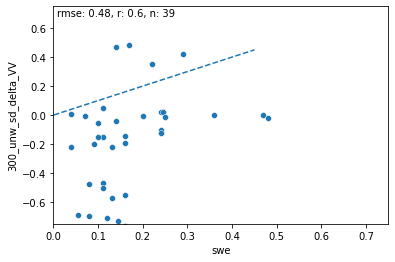

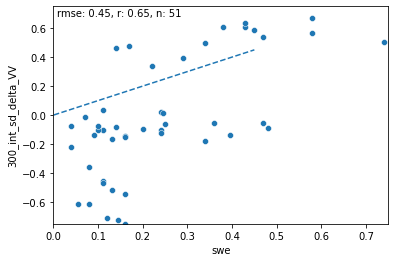

In [81]:
y = 'swe' # hn
for x in ['unw_sd_delta_VV', 'int_sd_delta_VV', 'nearest_int_sd_delta_VV', 'nearest_unw_sd_delta_VV',
          '300_unw_sd_delta_VV', '300_int_sd_delta_VV']:
    fig, ax = plt.subplots()
    # x = 'nearest_int_sd_delta_VV'
    sub = df.loc[df.Melt == 'No'].copy()
    sub.loc[:, x] = sub.loc[:, x] * (997/250)
    sns.scatterplot(data = sub, x = y, y = x, ax = ax)#, hue = 'Melt')
    ax.plot([-0.05,0.45], [-0.05,0.45], linestyle = 'dashed')
    rmse, r, n = get_stats(sub[y], sub[x])
    ax.text(.01, .99, s = f'rmse: {rmse:.2f}, r: {r:.2}, n: {n}', ha = 'left', va = 'top', transform = ax.transAxes)
    ax.set_xlim(0, 0.75)
    ax.set_ylim(-0.75, 0.75)
    plt.show()